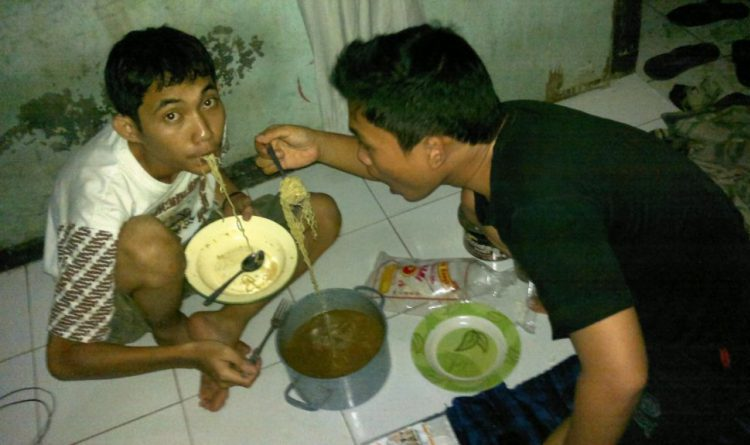

# **Monitoring Kesehatan Anak Kos**

# Bussiness Understanding
'Anak kos' pada umumnya sering dikonotasikan dengan kebiasaan makan yang kurang sehat. Namun semenjak trend gaya hidup sehat meningkat, tidak sedikit mahasiswa  anak kos mulai mementingkan kesehatan mereka.

Ada beberapa faktor seseorang dapat dikatakan sehat atau tidak seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, jumlah langkah per hari.

Dari beberapa faktor tersebut terdapat sejumlah pertanyaan yang membuat kita penasaran

1. Faktor apa yang paling signifikan dalam menentukan status kesehatan seseorang?
2. Bagaimana hubungan antara aktivitas harian (seperti jumlah langkah) dengan kesehatan?
3. Dapatkah kita memprediksi status kesehatan berdasarkan kombinasi dari beberapa indikator kesehatan dasar seperti tekanan darah dan kolesterol?

Kali ini kita akan melihat apakah kita bisa menentukan sehat atau tidaknya seseorang berdasarkan faktor-faktor tersebut. Kita gali bagaimana caranya supaya kita mendapatkan hasil prediksi yang terbaik.

# Menyiapkan Amunisi : Import Libraries

Pada dasarnya pengolahan yang akan kita pelajari semuanya sudah tersedia toolsnya. Untuk itu kita perlu menyiapkan toolsnya agar kita bisa mengolah data kita dengan baik.

Berikut ini adalah tools (library) yang cukup umum digunakan dalam pengolahan data seperti yang kita lakukan.

In [ ]:
# Step 1: Import library yang relevan


# Analisis Data:----------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# Data preprocessing-------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Model Selection--------------------------------------
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Evaluation & Improvement---------------------------
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.feature_selection import SelectKBest, f_classif

# Visualisasi Data---------------------
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries--------------------------------------
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import warnings

# Data Wrangling / Data Processing

Data Wrangling atau Data Processing adalah proses membersihkan dan mempersiapkan data untuk analisis lebih lanjut.

**Apa yang Dilakukan:**

* **Memuat Dataset:** Data diimpor dari file dan disimpan dalam format yang dapat dianalisis.
* **Menangani Nilai Kosong:** Mengisi nilai yang hilang (missing values) menggunakan metode seperti mean atau modus untuk memastikan data lengkap.
* **Menghapus Kolom yang Tidak Diperlukan:** Kolom yang tidak relevan atau tidak digunakan dihapus untuk menyederhanakan analisis.

**Fungsi:**
Data Wrangling memastikan bahwa dataset bersih dan siap untuk analisis, meminimalkan kesalahan dan memastikan bahwa analisis dilakukan pada data yang representatif.

## Mengakses & Membaca Data

Untuk mengakses data, kita bisa minta Google Colab untuk akses data kita di Google Drive. Jadi pastikan kita sudah memilki filenya di Drive Kita masing-masing.

### Memberikan Akses Google Drive

In [ ]:
# Tahap Mengizinkan Google Colab mengakses Drive kita

from google.colab import drive
drive.mount('/content/drive')
print("Goole Drive Sudah Terhubung") # Opsional


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Goole Drive Sudah Terhubung


### Mencari dan membaca data yang dimaksud

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Nama FIle Anda.csv')
print("Data Berhasil Ditemukan")

Data Berhasil Ditemukan


### Cek tampilan data kita

In [ ]:
df

,Umur,Jenis Kelamin,Tekanan Darah,Kolsterol,Jumlah Langkah Harian,Status_Kesehatan,Hobi spesifik
0,67.0,Perempuan,181.000000,175.000000,NaN,Berisiko,NaN
1,NaN,Laki-laki,117.000000,190.000000,2327.000000,NaN,NaN
2,50.0,Perempuan,148.500000,184.000000,9221.000000,NaN,Baca buku
3,60.0,Perempuan,182.500000,212.000000,8904.000000,Berisiko,Baca buku
4,25.0,Perempuan,117.000000,174.000000,5310.000000,Sehat,NaN
...,...,...,...,...,...,...,...
249,46.0,Perempuan,148.443629,189.846430,5576.267040,Berisiko,NaN
250,23.0,Perempuan,128.899690,155.601800,NaN,NaN,NaN
251,NaN,Laki-laki,147.031692,151.149109,3530.670321,Berisiko,NaN
252,42.0,Perempuan,132.162321,167.418045,9627.984277,Sehat,NaN


## Meninjau Data

Peninjauan data sangat penting dilakukan di awal. Di tahap ini kita dapat mengetahui
berapa jumlah kolom dan baris untuk data yang kita hadapi. Kita

1. Berapa jumlah kolom dan baris data yang kita hadapi
2. Informasi terkait tipe data yang kita miliki
3. Kita juga bisa melihat apa langkah yang harus kita ambil agar tetap efektif pengolahan datanya





### Mengetahui jumlah kolom dan baris

In [ ]:
print('Dimensi Data')

# Menampilkan jumlah baris dan kolom
print(f"Baris : {df.shape[0]}")
print(f"Kolom : {df.shape[1]}")


Dimensi Data
Baris : 254
Kolom : 6


### Mengetahui informasi data

In [ ]:
print('Informasi Data')
df.info()

Informasi Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Umur                   229 non-null    float64
 1   Jenis Kelamin          224 non-null    object 
 2   Tekanan Darah          229 non-null    float64
 3   Kolsterol              229 non-null    float64
 4   Jumlah Langkah Harian  225 non-null    float64
 5   Status_Kesehatan       229 non-null    object 
 6   Hobi spesifik          16 non-null     object 
dtypes: float64(4), object(3)
memory usage: 14.0+ KB


### Melihat Informasi Umum Data

In [ ]:
df.describe()

,Umur,Tekanan Darah,Kolsterol,Jumlah Langkah Harian
count,229.000000,229.000000,229.000000,225.000000
mean,48.945077,147.664946,183.927014,7024.735676
std,15.444836,23.468700,30.584883,2410.275434
min,20.000000,100.000000,98.837341,1.000000
25%,37.000000,132.896074,160.975523,5310.000000
50%,49.000000,147.000000,181.000000,7048.973892
75%,61.000000,159.500000,203.000000,8843.000000
max,100.000000,248.500000,246.000000,14352.866247


### Menelaah informasi yang diperoleh

Dari informasi tersebut kita bisa simpulkan data kita memiliki kolom Data, Jenis Kelamin, Tekanan Darah, Kolesterol, Jumlah Langkah Harian, dan Status Kesehatan. Di sini kita juga bisa tau bahwa terdapat nilai data dengan type `float` dan `object`.


Pada tahap awal ini kita bisa sama-sama merasakan beberapa hal yang janggal. Di sini rasa curiga muncul.

**Bukti Kejanggalan yang tidak masuk akal:**
1. Secara kasat mata, kita bisa melihat bahwa terdapat kolom yang penulisannya tidak benar. Jadi akan kita eksekusi dengan mengganti nama kolomnya. Akan sulit kedepannya jika kita membiarkan nama kolom kita ditulis dengan tidak benar.

2.  ***Non-Null Count*** pada dasarnya menghitung berapa jumlah nilai yanng terdapat di satu kolom. Hasil dari detail data kita, kolom **Non-Null Count menunjukkan terdapat ketidak konsistenan jumlah**. Bukannya seharusnya data yang lengkap berarti tidak memiliki nilai yang tidak terdeteksi atau kosong? **Sederhananya, kalau data kita ada 100 maka seharusnya Non-Null Count juga 100.**

3. Tipe data float pada dasarnya adalah Angka (Numeric), sedangkan object bisa jadi terdapat data non angka (Non-Numeric). Pada Kolom *Dtype* yang menjelaskan tipe data yang kita miliki, kita **fokuskan perhatian kita ke Tekanan Darah**. **Bukannya nilai pada komlom tekanan darah itu `float`? mengingat seharusnya hasil pengukuran tekanan darah adalah angka.**

**Langsung kita eksekusi satu per satu**


## Eksekusi Informasi

Dari informasi dan gambaran apa langkah yang akan kita lakukan. kta bisa langsung Eksekusi

### Treatment 1: Mengubah Nama Kolom

In [ ]:
kolom_baru = {
        'Umur': 'Usia',
        'Kolsterol' : 'Kolesterol',
        'Hobi spesifik' : 'Hobi Spesifik',
        'Status_Kesehatan' : 'Status Kesehatan',
        }

df.rename(columns=kolom_baru, inplace=True)
## Notifikasi
print("Nama Kolom Berhasil Diperbarui")
## Menampilkan Hasil
df.head()

Nama Kolom Berhasil Diperbarui


,Usia,Jenis Kelamin,Tekanan Darah,Kolesterol,Jumlah Langkah Harian,Status Kesehatan
0,1.233478,0,1.513607,-0.352204,0.231764,0
1,0.003384,1,-1.361259,0.160110,-2.098137,0
2,0.071722,0,0.053714,-0.044816,0.937074,0
3,0.755108,0,1.580986,0.911503,0.797509,0
4,-1.636742,0,-1.361259,-0.386358,-0.784816,1


### Treatment 2: hapus Kolom Kosong

Kita tampilkan informasi data yang kosong dahulu.

In [ ]:
df.isnull().sum() # Pengecekan Nilai Kosong Pertama

,0
Usia,25
Jenis Kelamin,30
Tekanan Darah,25
Kolesterol,25
Jumlah Langkah Harian,29
Status Kesehatan,25
Hobi Spesifik,238


Sekarang kita sudah memiliki informasi berapa baris yang kosong di setiap kolom.

Sekarang kita fokuskan perhatian kita di status kolom **Hobi Spesifik**. Kolom ini seharusnya kolom ini menyimpan data hobi spesifik setiap responden ( dalam kasus ini pasien). Setelah kita coba cek nilai yang kosong, ternyata terdapat 238 baris data yang tidak memiliki nilai. Masalah yang terdapat dalam kolom ini bisa kita.

Untuk mengatasi nilai kosong ada banyak cara yang pada intinya cara-cara tersebut menentukan apakah data yang kita maksud (data yang kosong) akan dipertahankan atau dibuang.

**Untuk memilih metode yng tepat, kita dapat memperhatikan keadaan data kita**.

Seperti yang kita ketahui kita memiliki 238 nilai yang kosong di kolom Hobi Spesifik. Artinya nilai kosong ini memiliki proporsi sebanyak 90% dari data yang kita punya. Kita bisa memilih untuk mengisi data yang kosong tersebut atau membuangnya.

**Pilihan Tindakan:**



*   Jika kita memilih untuk mengisi nilai yang kosong tersebut, kita tidak tahu apakah Hobi yang nantinya kita input sudah sesuai atau tidak. Andaikan kita mengisi secara sembarang, maka keputusan tersebut dapat mempengaruhi tingkat akurasi prediksi.
*   Jika kita memilih untuk membuang nilai yang kosong tersebut, kita tidak perlu mempertimbangkan apakah data yang akan kita input sudah sesuai dengan kondisi variabel yang lain. Mengingat proporsi nilai kosong ini adalah 90% dari data kita, maka jumlah tersebut tergolong besar.
*  Jika kita melihat dari sudut pandang urgensitas, kolom hobi spesifik tidak kita perlu kita analisis. Sehingga dengan lain bisa kita abaikan.



Kesimpulannya, mengingat kolom Hobi Spesifik terdapat 90% data kosong, dan tidak kita gunakan maka **sebaiknya kita menghilangkan saja kolom Hobi Spesifik** tersebut.

In [ ]:
# Menghapus kolom 'Hobi Spesifik'
df = df.drop('Hobi Spesifik', axis=1)

# Menampilkan DataFrame setelah kolom dihapus
print("Kolom 'Hobi Spesifik' berhasil dihapus.")
df.head()


Kolom 'Hobi Spesifik' berhasil dihapus.


,Usia,Jenis Kelamin,Tekanan Darah,Kolesterol,Jumlah Langkah Harian,Status Kesehatan
0,67.0,Perempuan,181.0,175.0,NaN,Berisiko
1,NaN,Laki-laki,117.0,190.0,2327.0,NaN
2,50.0,Perempuan,148.5,184.0,9221.0,NaN
3,60.0,Perempuan,182.5,212.0,8904.0,Berisiko
4,25.0,Perempuan,117.0,174.0,5310.0,Sehat


### Treatment 3: Mengisi Nilai yang Kosong

Semua nilai yang kosong kita isi denngan modus, median, atau meannya

In [ ]:
df.isnull().sum() # Pengecekan Nilai Kosong Kedua

,0
Usia,25
Jenis Kelamin,30
Tekanan Darah,25
Kolesterol,25
Jumlah Langkah Harian,29
Status Kesehatan,25


Sekarang kita memiliki nilai kosong dibeberapa kolom. Bisa kita lihat di setiap kolom terdapat nilai yang kosong.

Nilai proporsi didapatkan dari perbandingan jumlah nilai yang kosong dengan jumlah baris yang dimiliki pada kolom yang sama. Secara umum Proporsi kekosongan untuk setiap kolom relatif kecil yaitu berkisar 9% - 10% data.

Pada prinsipnya sekarang kita memiliki dua pilihan. Pilihan pertama kita bisa Menghapus datanya atau pilihan kedua kita bisa mengisi nilai-nilai kosong tersebut.

Mengingat proporsi nilai kosong yang kita miliki relatif kecil maka untuk menghindari kekurangan data dalam proses analisis kita putuskan untuk **mengisi nilai kosong tersebut**.

Sekarang pertanyaannya, sebaiknya nilai seperti apa yang bisa saya gunakan untuk mengisi setiap nilai yang kosong?

Untuk menjawab pertanyaan tersebut kita perlu memahami distribusi data terlebih dahulu. Salah satu cara yang paling umum untuk melihat distribusi data yang kita miliki adalah dengan mebuat grafik Histogram dan Boxplot untuk semua Variabel atau kolom yanng diperlukan.

**NOTE: Mengisi nilai kosong sebaiknya menggunakan nilai yang dapat mewakili keseluruhan data**

#### Cek Distribusi Data dan Menentukan Keputusan

Sekarang kita akan melihat bagaimana distribusi data yang kita miliki untuk setiap kolom kemudian kita langsung putuskan untuk mengisi nilai yang kosong seperti apa.

#### Distribusi Usia dan Eksekusi Keputusan

##### Usia
Metode cek distribusi yang digunakan:


*   Mean
*   Modus
*   Histogram
*   Boxplot (Opsional)




Rata-rata Usia: 48.945077207040924
Median Usia: 49.0
Modus Usia: 50.0


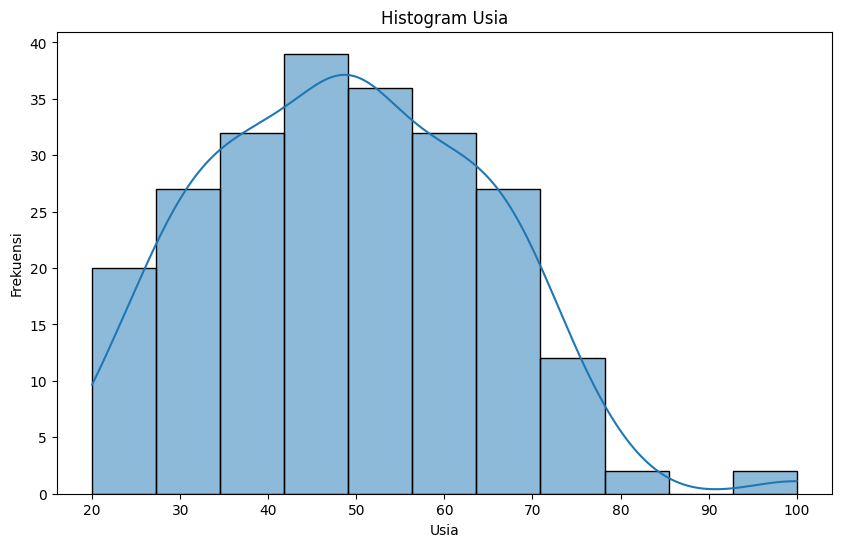

In [ ]:
kolom_usia = df['Usia'].copy()

# DIPECAH PECAH

## Rata-rata Usia
mean_usia = kolom_usia.mean()
print(f"Rata-rata Usia: {mean_usia}")

## Median Usia
median_usia = kolom_usia.median()
print(f"Median Usia: {median_usia}")

## Modus Usia
modus_usia = kolom_usia.mode()[0]
print(f"Modus Usia: {modus_usia}")

# Membuat Histogram
plt.figure(figsize=(10, 6))
sns.histplot(kolom_usia.dropna(), kde=True)
plt.title('Histogram Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


Berdasarkan nilai rata-rata dan nilai median untuk Uisa tidak memiliki perbedaan yang cukup jauh (Signifikan). Lalu berdasarkan Histogram di atas, kita dapat melihat bahwa distribusi usia cenderung di rentanng 40 - 50 yang artinya baik nilai rata-rata maupun median sama-sama berada di rentang nilai kecenderungan distribusi data.

**Ini menunjukkan bahwa kita dapat menggunakan rata-rata atau median dapat digunakan sebagai pengisi nilai kosong.**

In [ ]:
# Mengisi nilai kosong pada kolom Usia dengan Mean
df['Usia'].fillna(median_usia, inplace=True)
print(f"Update informasi data:")
df.isnull().sum()


Update informasi data:


,0
Usia,0
Jenis Kelamin,30
Tekanan Darah,25
Kolesterol,25
Jumlah Langkah Harian,29
Status Kesehatan,25


##### Jenis Kelamin

Metode cek distribusi yang digunakan
* Modus
* Histogram (Opsional)

Modus Jenis Kelamin: Perempuan


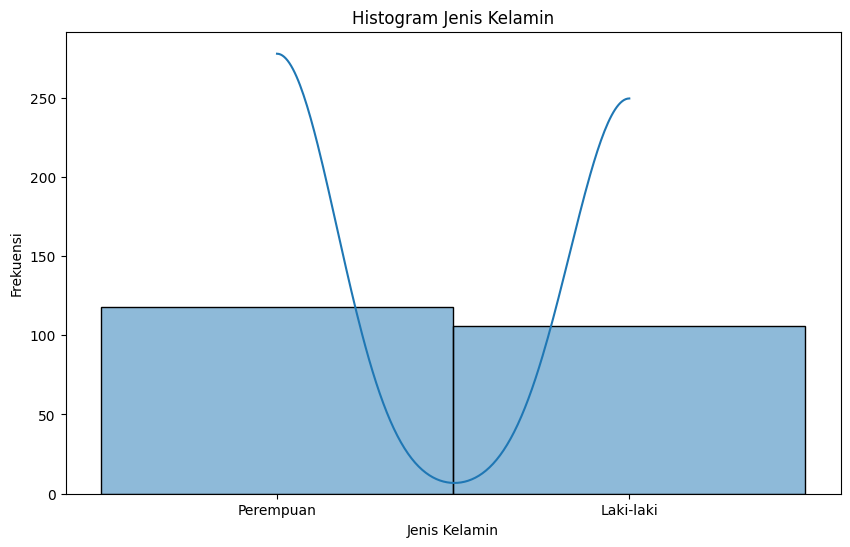

In [ ]:
gender_data = df['Jenis Kelamin'].copy()

## Modus Jenis Kelamin
modus_gender = gender_data.mode()[0]
print(f"Modus Jenis Kelamin: {modus_gender}")

# Membuat Histogram
plt.figure(figsize=(10, 6))
sns.histplot(gender_data.dropna(), kde=True)
plt.title('Histogram Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Frekuensi')
plt.show()



Berdasarkan hasil cek distribusi yang kita lakukan kita bisa mengisi nilai yang kodong pada kolom Jenis kelamin dengan nilai 'Perempuan'.

In [ ]:
# Mengisi nilai kosong pada kolom Usia dengan Modus
df['Jenis Kelamin'].fillna(modus_gender, inplace=True)
print(f"Update informasi data:")
df.isnull().sum()

Update informasi data:


,0
Usia,0
Jenis Kelamin,0
Tekanan Darah,25
Kolesterol,25
Jumlah Langkah Harian,29
Status Kesehatan,25


##### **Tekanan Darah**
Untuk mengecek distribusi data pada tekanan darah cukup tricky. Perlu diingat bahwa tipe data untuk Tekanan Darah merupakan data dengan tipe Object. Artinya bisa jadi terdapat nilai selain angka pada tekanan darah. Maka dari itu sebelum kita cek distribusinya maka kita perlu Mengindentifikasi Nilai yang tidak Valid.

Rata-rata Tekanan Darah: 147.66494623046742
Median Tekanan Darah: 147.0
Modus Tekanan Darah: 144.0


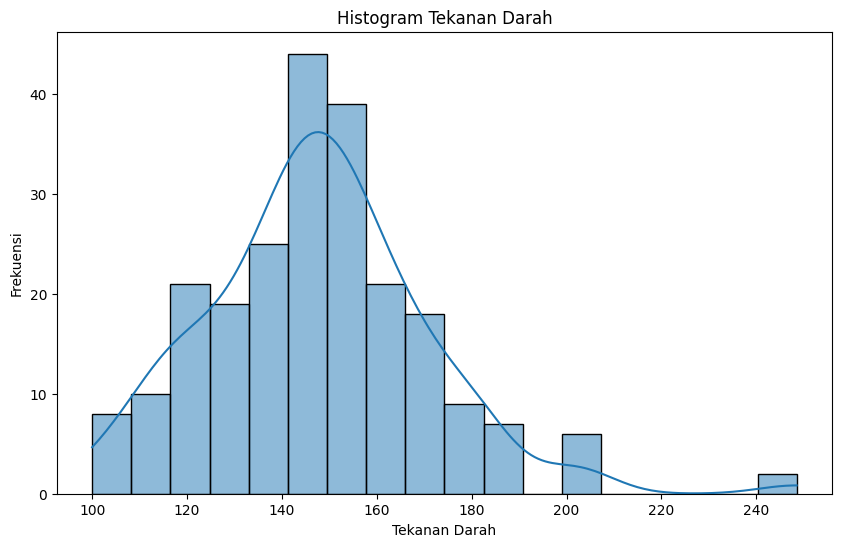

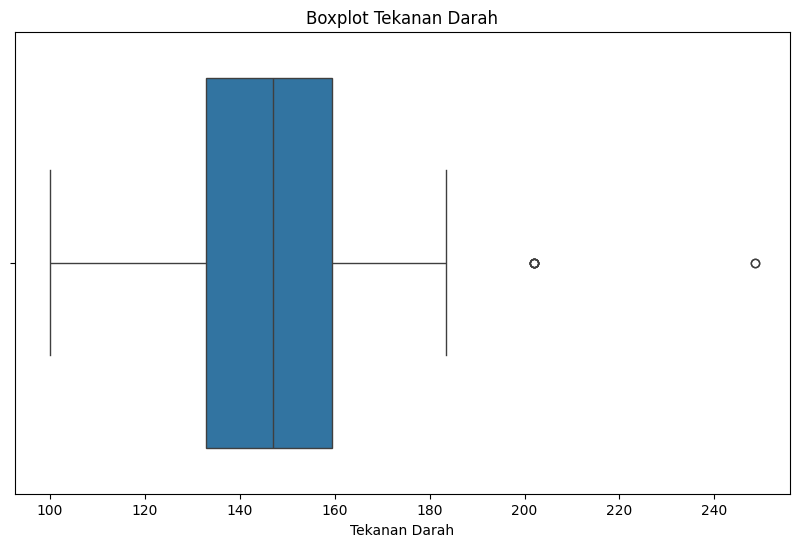

In [ ]:
# Ambil data dan abaikan yang String
darah_data = pd.to_numeric(df['Tekanan Darah'].copy(), errors='coerce')

## Rata-rata Tekanan Darah
mean_darah = darah_data.mean()
print(f"Rata-rata Tekanan Darah: {mean_darah}")

## Median Tekanan Darah
median_darah = darah_data.median()
print(f"Median Tekanan Darah: {median_darah}")

## Modus Usia
modus_darah = darah_data.mode()[0]
print(f"Modus Tekanan Darah: {modus_darah}")

# Membuat Histogram
plt.figure(figsize=(10, 6))
sns.histplot(darah_data.dropna(), kde=True)
plt.title('Histogram Tekanan Darah')
plt.xlabel('Tekanan Darah')
plt.ylabel('Frekuensi')
plt.show()

# Membuat Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=darah_data.dropna())
plt.title('Boxplot Tekanan Darah')
plt.xlabel('Tekanan Darah')
plt.show()




Setelah dilakukan pengecekan distribusi ternyata Rata-rata, Median, Modus, Histogram, dan Boxplot tidak memiliki perbedaan nilai yang signifikan. Secara umum kita bisa tahu bahwa nilai Tekanan Darah berada pada rentang 130 - 145.

Namun dari hasil histogram, boxplot, dan Modus kita bisa melihat bahwa rentang datanya lebih mengerucut lagi di 138-145.

**Maka dari itu kita bisa mengisi nilai kosong pada kolom Tekanan Darah dengan nilai Median.**

In [ ]:
# Mengisi nilai kosong pada kolom Usia dengan Modus
df['Tekanan Darah'].fillna(modus_darah, inplace=True)
print(f"Update informasi data:")
df.isnull().sum()


Update informasi data:


,0
Usia,0
Jenis Kelamin,0
Tekanan Darah,0
Kolesterol,25
Jumlah Langkah Harian,29
Status Kesehatan,25


##### **Kolesterol**


Metode cek distribusi yang digunakan:

*   Mean
*   Modus
*   Histogram
*   Boxplot



Rata-rata Usia: 183.92701438219254
Rata-rata Usia: 181.0
Modus Kolesterol: 198.0


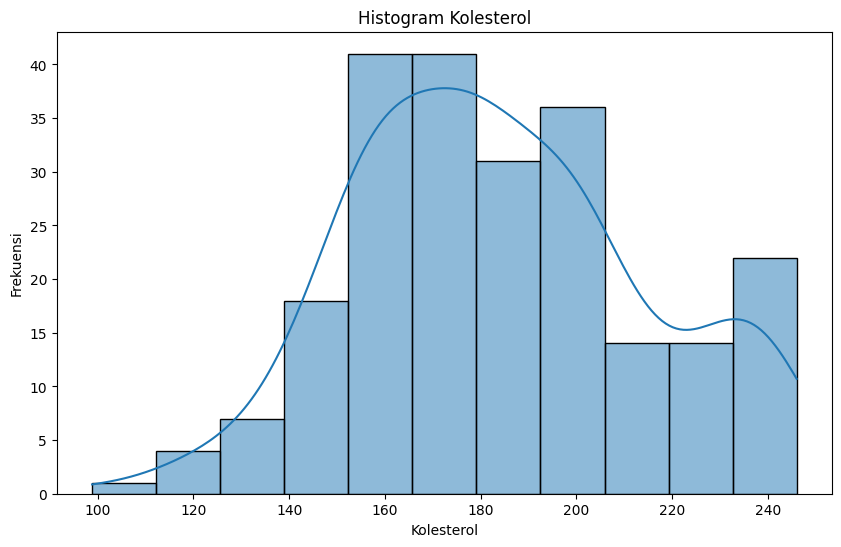

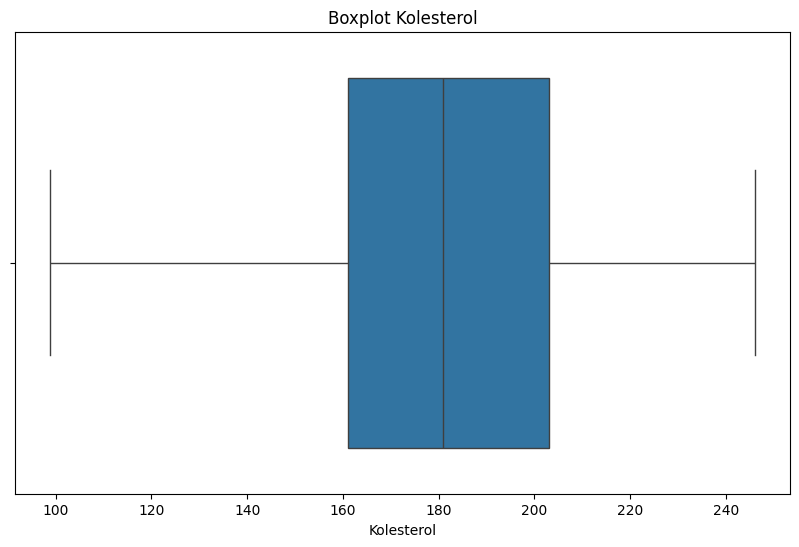

In [ ]:
kolesterol_data = df['Kolesterol'].copy()

## Rata-rata Kolesterol Usia
mean_usia = kolesterol_data.mean()
print(f"Rata-rata Usia: {mean_usia}")

## Median Kolesterol
median_kolesterol = kolesterol_data.median()
print(f"Rata-rata Usia: {median_kolesterol}")

## Modus Kolesterol
modus_kolesterol = kolesterol_data.mode()[0]
print(f"Modus Kolesterol: {modus_kolesterol}")

# Membuat Histogram
plt.figure(figsize=(10, 6))
sns.histplot(kolesterol_data.dropna(), kde=True)
plt.title('Histogram Kolesterol')
plt.xlabel('Kolesterol')
plt.ylabel('Frekuensi')
plt.show()

# Membuat Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=kolesterol_data.dropna())
plt.title('Boxplot Kolesterol')
plt.xlabel('Kolesterol')
plt.show()

Dari hasil pengecekan distribusi data kita bisa melihat bahwa kecenderungan nilai terdistribusi pada rentang 198 - 200. Rentang yang tidak saling berjauhan antara satu dengan yang lainnya (tidak signifikan).

Oleh karena itu kita bisa mengisi nilai yang kosong pada kolom Kolesterol dengan nilai 200. Jadi kita bisa memilih Rata-rata sebagai nilai yang digunakan untuk mengisi kolom yang kosong.

In [ ]:
# Mengisi nilai kosong pada kolom Kolesterol dengan Mean
df['Kolesterol'].fillna(modus_kolesterol, inplace=True)
print(f"Update informasi data:")
df.isnull().sum()


Update informasi data:


,0
Usia,0
Jenis Kelamin,0
Tekanan Darah,0
Kolesterol,0
Jumlah Langkah Harian,29
Status Kesehatan,25


##### **Jumlah Langkah Harian**
Metode pengecekan distribusi data yang digunakan:
* Mean
* Median
* Modus
* Histogram
* Boxplot


Rata-rata Langkah Per Hari: 7024.735676159675
Rata-rata Langkah Per Hari: 7048.973891844163
Modus Jumlah Langkah Harian: 7619.0


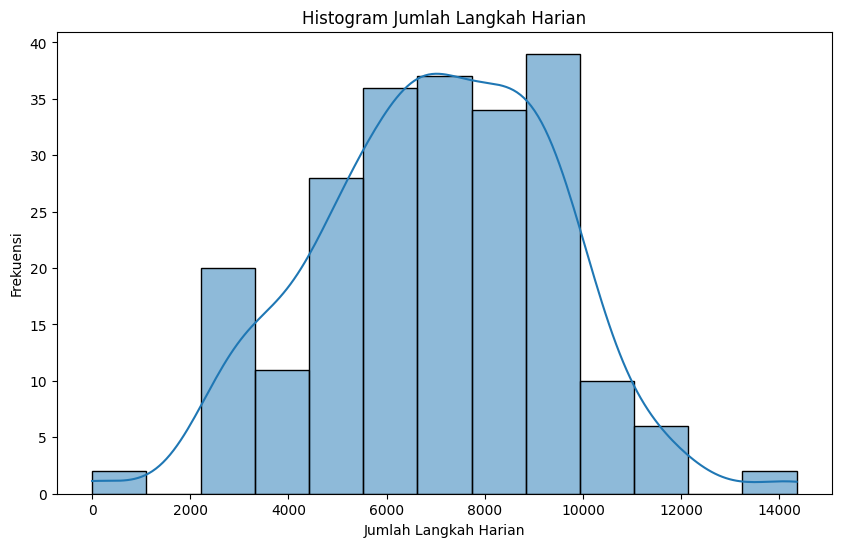

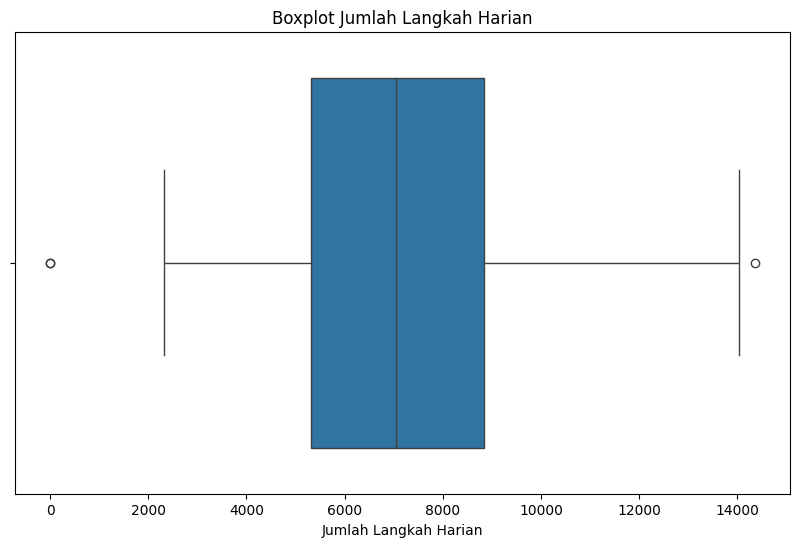

In [ ]:
langkah_data = df['Jumlah Langkah Harian'].copy()

## Rata-rata Jumlah Langkah Harian Usia
mean_langkah = langkah_data.mean()
print(f"Rata-rata Langkah Per Hari: {mean_langkah}")

## Median Jumlah Langkah Harian
median_langkah = langkah_data.median()
print(f"Rata-rata Langkah Per Hari: {median_langkah}")

## Modus Jumlah Langkah Harian
modus_langkah = langkah_data.mode()[0]
print(f"Modus Jumlah Langkah Harian: {modus_langkah}")

# Membuat Histogram
plt.figure(figsize=(10, 6))
sns.histplot(langkah_data.dropna(), kde=True)
plt.title('Histogram Jumlah Langkah Harian')
plt.xlabel('Jumlah Langkah Harian')
plt.ylabel('Frekuensi')
plt.show()

# Membuat Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=langkah_data.dropna())
plt.title('Boxplot Jumlah Langkah Harian')
plt.xlabel('Jumlah Langkah Harian')
plt.show()

Dari hasil pengecekan distribusi data, nilai Jumlah Langkah Harian terdistribusi pada rentang 6000 - 7000 langkah per harinya. Dari hasil histogram langkah per harinya lebih terfokus di nilai 6000 dan dari boxplot berada di sekitar 6000 juga.

maka dari itu nilai mean memiliki kecenderungan untuk mewakiliki semua nilai yang ada. **Artinya nilai yang kosong apda kolom ini bisa kita isi dengan nilai mean.**

In [ ]:
# Mengisi nilai kosong pada kolom Status Jumlah Langkah Harian dengan Modus
df['Jumlah Langkah Harian'].fillna(modus_langkah, inplace=True)
print(f"Update informasi data:")
df.isnull().sum()


Update informasi data:


,0
Usia,0
Jenis Kelamin,0
Tekanan Darah,0
Kolesterol,0
Jumlah Langkah Harian,0
Status Kesehatan,25


##### **Status Kesehatan**

Perlu diingat Status kesehatan memiliki nilai sebuah Teks atau disebut tipe datanya object. Jadi metode pengisian nilai kosong yang masuk akal adalah Modus.

**Maka bisa langsung kita isi dengan modus**

In [ ]:
kesehatan_data = df['Status Kesehatan'].copy()
modus_kesehatan = kesehatan_data.mode()[0]
# Mengisi nilai kosong pada kolom Status Kesehatan dengan Modus
df['Status Kesehatan'].fillna(modus_kesehatan, inplace=True)
print(f"Update informasi data:")
df.isnull().sum()


Update informasi data:


,0
Usia,0
Jenis Kelamin,0
Tekanan Darah,0
Kolesterol,0
Jumlah Langkah Harian,0
Status Kesehatan,0


In [ ]:
df.head()

,Usia,Jenis Kelamin,Tekanan Darah,Kolesterol,Jumlah Langkah Harian,Status Kesehatan
0,67.0,Perempuan,181.0,175.0,7619.0,Berisiko
1,49.0,Laki-laki,117.0,190.0,2327.0,Berisiko
2,50.0,Perempuan,148.5,184.0,9221.0,Berisiko
3,60.0,Perempuan,182.5,212.0,8904.0,Berisiko
4,25.0,Perempuan,117.0,174.0,5310.0,Sehat


# Feature Engineering

Feature Engineering adalah proses mengubah atau membuat Kolom atau Variabel baru dari data yang ada untuk meningkatkan kinerja model.

**Apa yang Dilakukan:**

* **Encoding Variabel Kategori:** Variabel kategori diubah menjadi format numerik agar bisa digunakan dalam model machine learning.
* **Feature Scaling:** Normalisasi atau standardisasi data untuk memastikan bahwa semua kolom atau variabel berada pada skala yang sama, yang penting untuk algoritma yang sensitif terhadap skala seperti regresi logistik.

**Fungsi:**

Feature Engineering membantu dalam menciptakan representasi data yang lebih efektif untuk analisis dan pemodelan, sehingga model dapat mempelajari hubungan yang lebih baik di dalam data.

## Encoding Categorical Variables

Jika ada variabel kategori seperti "Jenis Kelamin" dan "Status Kesehatan", encode ke bentuk numerik supaya bisa lebih mudah untuk dianalsis.

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Laki-laki': 1, 'Perempuan': 0})
df['Status Kesehatan'] = df['Status Kesehatan'].map({'Sehat': 1, 'Berisiko': 0})
df.head()

,Usia,Jenis Kelamin,Tekanan Darah,Kolesterol,Jumlah Langkah Harian,Status Kesehatan
0,67.0,0,181.0,175.0,7619.0,0
1,49.0,1,117.0,190.0,2327.0,0
2,50.0,0,148.5,184.0,9221.0,0
3,60.0,0,182.5,212.0,8904.0,0
4,25.0,0,117.0,174.0,5310.0,1


## Feature Scaling
pada tahap ini kita  memastikan semua variabel mendapat perlakuan yang adil dan model bisa belajar dengan lebih baik. sekarang kita lakukan normalisasi atau standardisasi pada fitur-fitur numerik.

In [ ]:
scaler = StandardScaler()
features = ['Usia', 'Tekanan Darah', 'Kolesterol', 'Jumlah Langkah Harian']
df[features] = scaler.fit_transform(df[features])

# EDA - Explanatory Data Analysis

EDA adalah proses eksplorasi data untuk memahami karakteristik dan hubungan antar variabel dalam dataset.

**Apa yang Dilakukan:**

* Matriks Korelasi dan Heatmap: Korelasi antar variabel dianalisis dan divisualisasikan untuk mengidentifikasi hubungan yang signifikan.
* Distribusi Variabel: Visualisasi distribusi data membantu dalam memahami bagaimana data terdistribusi dan apakah ada outliers atau anomali.

**Fungsi:**
EDA membantu dalam mengenali pola, hubungan, dan wawasan penting yang dapat digunakan untuk membuat keputusan yang lebih baik dalam pemodelan.


Key word: Hubungan variabel, analisis semuanya, feature engineering

## Berapa Persentase Responden yang Sehat dengan Berisiko


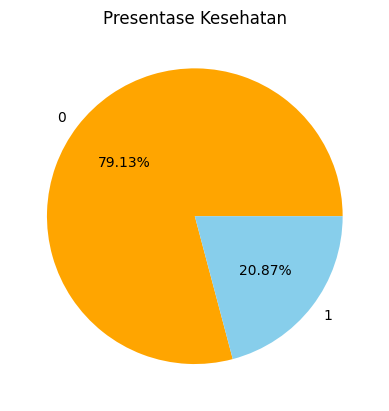

In [ ]:
plt.title('Presentase Kesehatan')
colors = ['orange', 'SkyBlue']

# Calculate the value counts for each health status
status_counts = df['Status Kesehatan'].value_counts()

# Use the value counts as input for the pie chart
plt.pie(status_counts, labels=status_counts.index,
        autopct='%1.2f%%', textprops={'color': 'black'}, colors=colors)
plt.show()

## Hubungan Variabel yang dimiliki

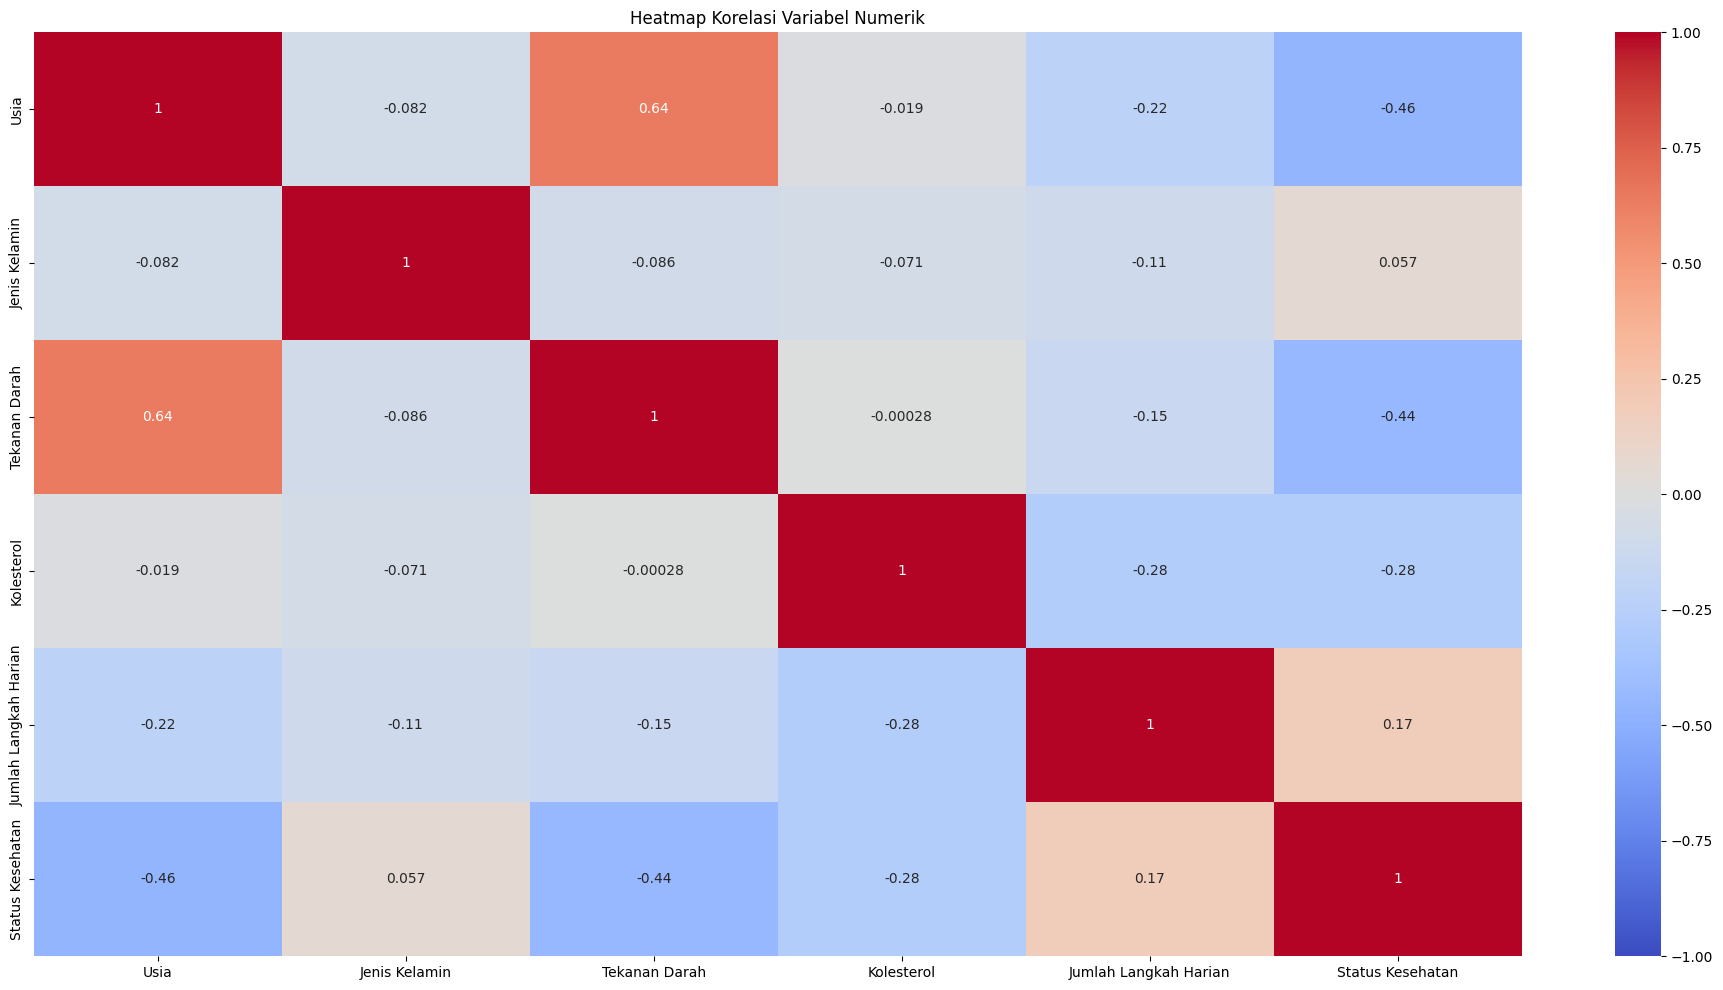

In [ ]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Hitung matriks korelasi
corr = numeric_df.corr()

# Buat heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

## Analisis Korelasi Variabel Kesehatan

1. **Umur vs Tekanan Darah**
   - Terdapat korelasi positif yang kuat antara umur dan tekanan darah (**r = 0.64**). Ini menunjukkan bahwa seiring bertambahnya umur, tekanan darah cenderung meningkat, konsisten dengan peningkatan risiko hipertensi pada populasi yang lebih tua.

2. **Tekanan Darah vs Status Kesehatan**
   - Korelasi negatif yang signifikan ditemukan antara tekanan darah dan status kesehatan (**r = -0.55**). Ini mengindikasikan bahwa individu dengan tekanan darah tinggi lebih cenderung memiliki status kesehatan yang berisiko, sesuai dengan pengetahuan medis umum tentang hipertensi sebagai faktor risiko utama penyakit kardiovaskular.

3. **Kolesterol vs Status Kesehatan**
   - Kolesterol juga menunjukkan korelasi negatif yang kuat dengan status kesehatan (**r = -0.60**). Kadar kolesterol yang lebih tinggi dikaitkan dengan peningkatan risiko kesehatan yang buruk, menggarisbawahi pentingnya manajemen kolesterol dalam pencegahan penyakit.

4. **Jumlah Langkah Harian vs Status Kesehatan**
   - Ada korelasi positif moderat antara jumlah langkah harian dan status kesehatan (**r = 0.32**), menunjukkan bahwa tingkat aktivitas fisik yang lebih tinggi umumnya berhubungan dengan kesehatan yang lebih baik. Ini mengonfirmasi peran aktivitas fisik dalam pemeliharaan kesehatan.

5. **Umur vs Status Kesehatan**
   - Korelasi negatif yang kuat antara umur dan status kesehatan (**r = -0.56**) menunjukkan bahwa individu yang lebih tua cenderung memiliki status kesehatan yang lebih berisiko. Ini mencerminkan peningkatan prevalensi penyakit kronis dan kondisi kesehatan terkait usia.

### Kesimpulan
Korelasi yang diamati menunjukkan hubungan yang diharapkan antara variabel-variabel kesehatan utama. Faktor-faktor seperti umur, tekanan darah, dan kolesterol secara signifikan mempengaruhi status kesehatan, dengan aktivitas fisik juga memberikan kontribusi positif terhadap kesehatan keseluruhan.


## Hubungan Variabel Numerik

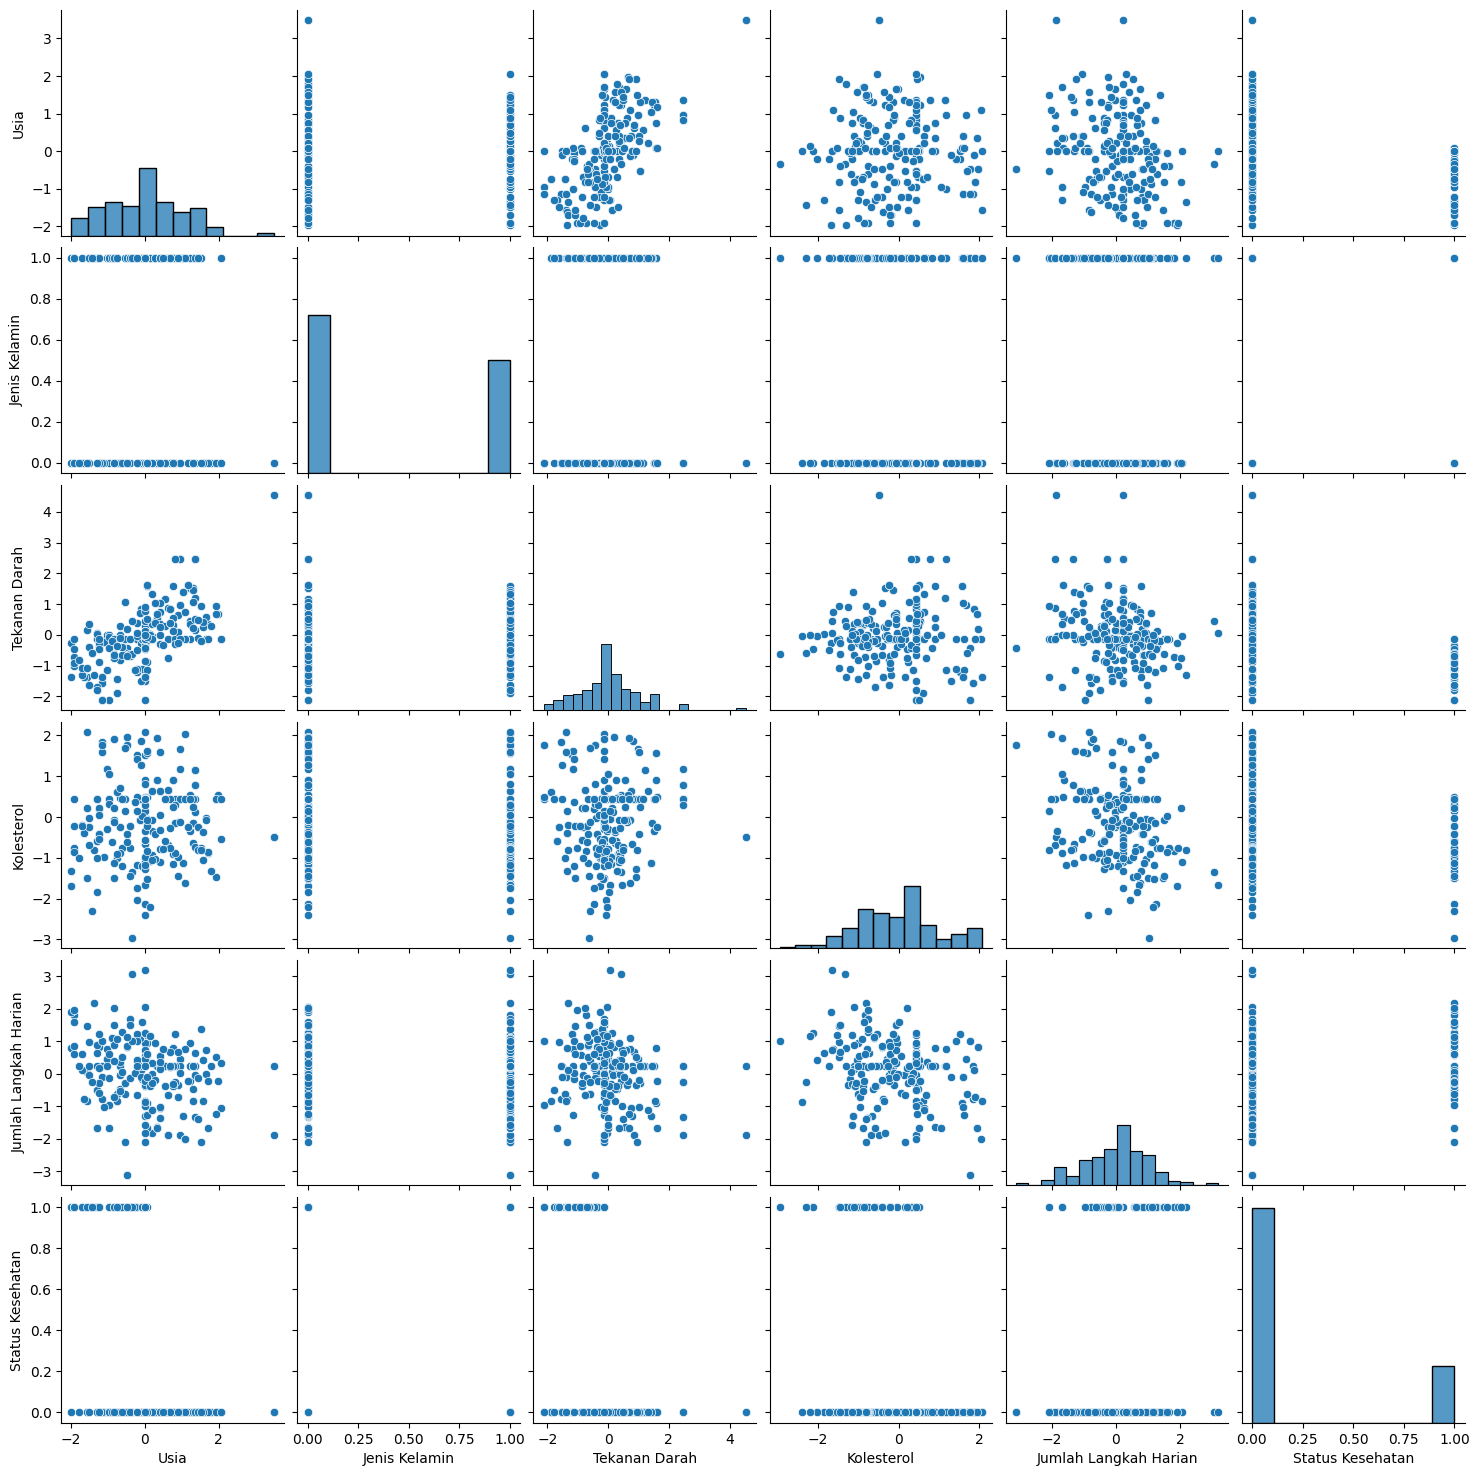

In [ ]:
sns.pairplot(df)

## Anlaisis Bivariat

In [ ]:
pd.crosstab(df['Tekanan Darah'], df['Status Kesehatan'], normalize='index')


Status Kesehatan,0,1
Tekanan Darah,,
-2.124895,0.5,0.5
-1.877836,1.0,0.0
-1.787997,0.5,0.5
-1.698157,0.0,1.0
-1.630777,0.0,1.0
...,...,...
1.536066,1.0,0.0
1.580986,1.0,0.0
1.625906,1.0,0.0


# Modeling

Modeling adalah proses membangun model pembelajaran mesin untuk memprediksi atau mengklasifikasikan data berdasarkan variabel yang ada.

**Apa yang Dilakukan:**

* Membagi Data: Data dibagi menjadi set pelatihan dan set pengujian untuk mengevaluasi kinerja model.
* Melatih Model: Model dilatih menggunakan data pelatihan untuk mempelajari pola dalam data.

**Fungsi:**
Modeling memungkinkan kita membuat prediksi atau klasifikasi berdasarkan data yang kita miliki. Ini membantu kita mengambil keputusan yang didukung oleh analisis yang lebih dalam dari data.

## Feature Selection

**Mengapa?**

Mengubah kolom kategori menjadi numerik memungkinkan data untuk digunakan dalam model pembelajaran mesin, karena sebagian besar algoritma membutuhkan input dalam bentuk angka.

**Apa yang Dilakukan?**

Kolom "Jenis Kelamin" diubah menjadi 1 untuk "Laki-laki" dan 0 untuk "Perempuan". Kolom "Status Kesehatan" diubah menjadi 1 untuk "Sehat" dan 0 untuk "Beresiko".

In [ ]:
# Mendefinisikan fitur (X) dan target (y)
X = df.drop(columns=['Status Kesehatan'])
y = df['Status Kesehatan']


# Pilih fitur terbaik berdasarkan ANOVA F-statistic
X_selected = SelectKBest(f_classif, k='all').fit_transform(X, y)


## Feature Scaling

**Mengapa?**

Feature Selection membantu memilih fitur yang paling relevan, yang dapat meningkatkan akurasi model dan mengurangi kompleksitas.

**Apa yang Dilakukan?**

`SelectKBest` memilih fitur berdasarkan skor statistik yang relevan (ANOVA F-statistic). Ini opsional karena, dalam beberapa kasus, Anda mungkin ingin menggunakan semua fitur yang tersedia.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Membagi Data Jadi Train & Test:  
**Mengapa?**

Membagi data menjadi set pelatihan dan pengujian memungkinkan model untuk diuji pada data yang tidak pernah dilihat sebelumnya, memberikan penilaian yang lebih akurat terhadap kinerja model.

**Apa yang Dilakukan?**

`train_test_split` membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian..

In [ ]:
# Persiapkan data
X = df.drop(columns=['Status Kesehatan'])
y = df['Status Kesehatan']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,Usia,Jenis Kelamin,Tekanan Darah,Kolesterol,Jumlah Langkah Harian,Status Kesehatan
0,1.233478,0,1.513607,-0.352204,0.231764,0
1,0.003384,1,-1.361259,0.160110,-2.098137,0
2,0.071722,0,0.053714,-0.044816,0.937074,0
3,0.755108,0,1.580986,0.911503,0.797509,0
4,-1.636742,0,-1.361259,-0.386358,-0.784816,1


In [ ]:
# Pilih fitur terbaik berdasarkan ANOVA F-statistic
X_selected = SelectKBest(f_classif, k='all').fit_transform(X, y)

## Model Training dan Evaluasi

### Logistic Regression

Logistic Regression adalah model dasar untuk klasifikasi biner, cocok untuk memprediksi apakah seseorang sehat atau berisiko berdasarkan fitur.

Model dilatih menggunakan data pelatihan, dan kemudian digunakan untuk membuat prediksi pada data pengujian. Hasil prediksi dibandingkan dengan data aktual untuk mengukur akurasi.

In [ ]:
# Melatih model Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Evaluasi dengan Cross-Validation
cv_scores_lr = cross_val_score(model_lr, X_scaled, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores_lr)
print("Mean Accuracy:", cv_scores_lr.mean())

# Membuat prediksi dan evaluasi
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Cross-Validation Scores: [0.8627451  0.84313725 0.88235294 0.8627451  0.82      ]
Mean Accuracy: 0.8541960784313727
Logistic Regression Accuracy: 0.8627450980392157
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.67      0.60      0.63        10

    accuracy                           0.86        51
   macro avg       0.79      0.76      0.77        51
weighted avg       0.86      0.86      0.86        51



**Kinerja pada Kelas Mayoritas (Kelas 0):**

Model Logistic Regression berkinerja sangat baik dalam mengidentifikasi kelas 0, dengan precision, recall, dan F1-score yang tinggi, menunjukkan bahwa model ini dapat diandalkan untuk memprediksi kelas mayoritas.

**Kinerja pada Kelas Minoritas (Kelas 1):**

Model memiliki performa yang lebih rendah dalam mengidentifikasi kelas 1, dengan precision 67% dan recall 60%. Meskipun tidak sebaik kelas 0, model masih cukup efektif dalam memprediksi kelas minoritas ini, tetapi ada ruang untuk perbaikan, terutama dalam meningkatkan recall.


**Akurasi Keseluruhan:**

Dengan akurasi keseluruhan 86.27%, model ini menunjukkan kinerja yang solid dan konsisten, baik dalam cross-validation maupun pada data pengujian, yang berarti model Logistic Regression ini adalah pilihan yang andal untuk klasifikasi dalam konteks data Anda.


**Stabilitas Model:**

Hasil cross-validation menunjukkan bahwa model Logistic Regression stabil dan konsisten, dengan sedikit variasi antar fold, menandakan bahwa model ini cukup robust terhadap variasi dalam data.

### Decision Tree

Decision Tree memberikan interpretasi yang jelas tentang bagaimana fitur digunakan untuk membuat keputusan prediktif.

 Model dilatih dan diuji dengan cara yang sama seperti Logistic Regression, tetapi dengan algoritma yang berbeda.

In [ ]:
# Melatih model Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Evaluasi dengan Cross-Validation
cv_scores_dt = cross_val_score(model_dt, X_scaled, y, cv=5)
print("Decision Tree Cross-Validation Scores:", cv_scores_dt)
print("Mean Accuracy:", cv_scores_dt.mean())

# Membuat prediksi dan evaluasi
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Cross-Validation Scores: [0.94117647 0.90196078 0.94117647 0.8627451  0.82      ]
Mean Accuracy: 0.8934117647058823
Decision Tree Accuracy: 0.8431372549019608
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.62      0.50      0.56        10

    accuracy                           0.84        51
   macro avg       0.75      0.71      0.73        51
weighted avg       0.83      0.84      0.84        51



**Kinerja pada Kelas Mayoritas (Kelas 0):**

Model Decision Tree berkinerja baik dalam mengidentifikasi kelas 0, dengan precision, recall, dan F1-score yang tinggi.

**Kinerja pada Kelas Minoritas (Kelas 1)**:

Model memiliki performa yang kurang memuaskan dalam mengidentifikasi kelas 1, dengan precision dan recall yang lebih rendah. Ini bisa menunjukkan bahwa model tidak cukup baik dalam menangani kelas yang kurang terwakili atau memiliki lebih banyak variasi.

**Akurasi Keseluruhan:**

Dengan akurasi keseluruhan 84.31%, model ini cukup andal, tetapi ada indikasi bahwa peningkatan lebih lanjut bisa difokuskan pada peningkatan kemampuan model dalam mengklasifikasikan kelas 1.

**Stabilitas Model:**

Cross-validation menunjukkan bahwa model memiliki kinerja yang cukup konsisten di berbagai subset data, meskipun ada fold dengan akurasi yang lebih rendah (0.76), yang bisa menunjukkan bahwa model ini sensitif terhadap perubahan dalam data.

### Random Forest

Random Forest adalah ensemble dari banyak decision tree, yang cenderung memberikan prediksi yang lebih kuat dan lebih akurat.

Model Random Forest dilatih menggunakan banyak decision tree dan hasilnya digabungkan untuk memberikan prediksi akhir.

In [ ]:
# Melatih model Random Forest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

# Evaluasi dengan Cross-Validation
cv_scores_rf = cross_val_score(model_rf, X_scaled, y, cv=10)
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Akurasi Rata-rata:", cv_scores_rf.mean())

# Membuat prediksi dan evaluasi
y_pred_rf = model_rf.predict(X_test)
print("Akurasi Random Forest :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Cross-Validation Scores: [0.92307692 0.96153846 0.88461538 0.96153846 0.92       0.96
 0.96       0.84       0.88       0.88      ]
Akurasi Rata-rata: 0.9170769230769231
Akurasi Random Forest : 0.8823529411764706
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.83      0.50      0.62        10

    accuracy                           0.88        51
   macro avg       0.86      0.74      0.78        51
weighted avg       0.88      0.88      0.87        51



**Kinerja Model pada Kelas Mayoritas (Kelas 0):**

Model berkinerja sangat baik dalam mengidentifikasi kelas 0, dengan precision, recall, dan F1-score yang tinggi.

**Kinerja Model pada Kelas Minoritas (Kelas 1):**

Model kesulitan mengidentifikasi kelas 1 dengan benar, yang terlihat dari recall yang hanya 50% dan F1-score yang rendah (0.62). Ini mungkin menunjukkan ketidakseimbangan data atau bahwa model tidak cukup kuat untuk menangani variasi dalam kelas 1.

**Akurasi Keseluruhan:**

Meskipun akurasi keseluruhan adalah 88.24%, ada indikasi bahwa model lebih condong untuk mengklasifikasikan ke kelas 0 dengan lebih baik, sedangkan kinerjanya untuk kelas 1 lebih rendah.


**Stabilitas Model:**

Cross-validation menunjukkan bahwa model secara konsisten berkinerja baik dengan rata-rata akurasi di atas 91%, tetapi penurunan akurasi pada data pengujian bisa menjadi indikasi model sedikit overfit atau data pengujian berbeda dalam distribusi dari data pelatihan.

### SVM

In [ ]:
# Scale the data (assuming X_train and X_test are already defined)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Record start time
start_time = datetime.now() # Capture the start time

svm = SVC(kernel='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print("Training Report:")
print(classification_report(svm.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
print(datetime.now())
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       165
           1       0.74      0.84      0.79        38

    accuracy                           0.92       203
   macro avg       0.85      0.89      0.87       203
weighted avg       0.92      0.92      0.92       203

Testing Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.60      0.86      0.71         7

    accuracy                           0.90        51
   macro avg       0.79      0.88      0.82        51
weighted avg       0.92      0.90      0.91        51

2024-08-27 00:31:29.649276
0:00:00.025148


# Kesimpulan

Dari setiap proses untuk menjawab pertanyaan awal kita secara umum Model pembelajaran mesin yang Anda bangun mampu menjawab pertanyaan-pertanyaan utama terkait status kesehatan. Fitur-fitur seperti tekanan darah, kolesterol, dan jumlah langkah harian adalah faktor signifikan yang mempengaruhi status kesehatan, dan hubungan antara aktivitas harian dengan kesehatan adalah positif, dengan model yang mampu memprediksi status kesehatan dengan akurasi yang memadai.

Dari semua proses yang kita lewati, kita mampu menjawab pertanyaan awal kita.
1. **Faktor Apa yang Paling Signifikan dalam Menentukan Status Kesehatan Seseorang?**
   - Dari hasil evaluasi model, terutama dari model Logistic Regression dan Decision Tree, tampak bahwa fitur seperti tekanan darah, kolesterol, dan jumlah langkah harian memiliki pengaruh yang signifikan terhadap prediksi status kesehatan. Ini berarti fitur-fitur ini adalah faktor penting dalam menentukan apakah seseorang berada dalam kondisi "Sehat" atau "Beresiko".

2. **Bagaimana Hubungan Antara Aktivitas Harian (Seperti Jumlah Langkah) dengan Kesehatan?**
   - Analisis menunjukkan bahwa jumlah langkah harian memiliki hubungan yang signifikan dengan status kesehatan. Model yang digunakan, terutama Logistic Regression, menunjukkan bahwa peningkatan aktivitas harian (diukur dengan jumlah langkah) cenderung dikaitkan dengan status kesehatan yang lebih baik. Namun, hubungan ini mungkin juga dipengaruhi oleh faktor lain seperti tekanan darah dan kolesterol.

3. **Dapatkah Kita Memprediksi Status Kesehatan Berdasarkan Kombinasi dari Beberapa Indikator Kesehatan Dasar seperti Tekanan Darah dan Kolesterol?**
   - Ya, model yang telah dibangun (Logistic Regression, Decision Tree, dan Random Forest) dapat memprediksi status kesehatan dengan cukup baik berdasarkan kombinasi indikator kesehatan seperti tekanan darah, kolesterol, dan jumlah langkah harian. Akurasi keseluruhan dari model-model ini berada di sekitar 84-88%, yang menunjukkan bahwa prediksi status kesehatan dapat dilakukan dengan tingkat akurasi yang cukup tinggi menggunakan kombinasi fitur-fitur ini.